In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [23]:
data = pd.read_csv("student-mat.csv", sep=";", encoding="utf-8")
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [24]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [25]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Checking for null values

In [26]:
print("Missing values: ",data.isnull().sum())

Missing values:  school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [27]:
data.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [28]:
data.shape

(395, 33)

Replacing missing values with median

In [29]:
data.fillna(data.median(numeric_only=True), inplace=True)

Removing duplicate entries

In [30]:
data.drop_duplicates(inplace=True)

 What is the average score in math (G3)?

In [32]:
print("Average Final Grade (G3):", data["G3"].mean())

Average Final Grade (G3): 10.415189873417722


How many students scored above 15 in their final grade (G3)?


In [34]:
count = 0
for g3 in data["G3"]:
    if g3 > 15:
        count += 1
print("Number of students scoring above 15 in G3:", count)

Number of students scoring above 15 in G3: 40


Is there a correlation between study time (study time) and the final grade (G3)?

In [35]:
corre=data["studytime"].corr(data["G3"])
print(corre)

0.09781968965319626


Which gender has a higher average final grade (G3)?

In [37]:
avg_male = data[data["sex"] == "M"]["G3"].mean()
avg_female = data[data["sex"] == "F"]["G3"].mean()
print("Male:", avg_male)
print("Female:", avg_female)
if avg_male > avg_female:
    print("Males have a higher average final grade.")
else:
    print("Females have a higher average final grade.")

Male: 10.914438502673796
Female: 9.966346153846153
Males have a higher average final grade.


DATA VISUALIZATION

Plot a histogram of final grades (G3).

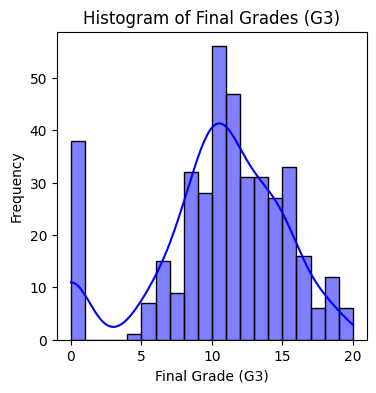

In [47]:
plt.figure(figsize=(4, 4))
sns.histplot(data['G3'], kde=True, bins=20, color='blue')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

Create a scatter plot between study time (study time) and final grade (G3).


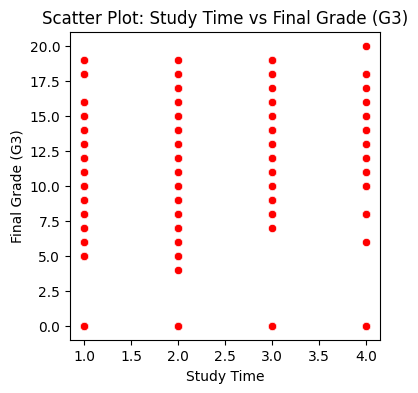

In [48]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='studytime', y='G3', data=data, color='red')
plt.title('Scatter Plot: Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

<ipython-input-49-ce27d7cd7a47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='Set2')


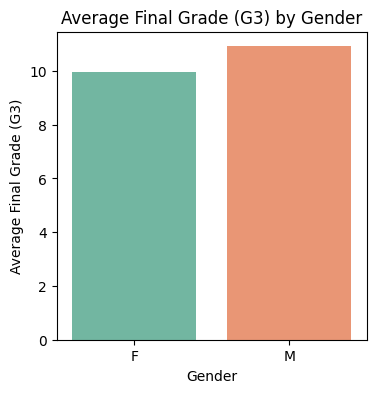

In [49]:
avg_scores = data.groupby('sex')['G3'].mean()
plt.figure(figsize=(4,4))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='Set2')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()